In [186]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx
import networkx as nx

In [187]:
df_origin = pd.read_feather('data/od_origin.feather')
df_des = pd.read_feather('data/od_des.feather')


In [188]:
oa_london = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp")
oa_london = oa_london.to_crs(epsg=27700)

ward_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Ward.shp")
ward_shp = ward_shp.to_crs(epsg=27700)

borough_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
borough_shp = borough_shp.to_crs(epsg=27700)

msoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
msoa_shp = msoa_shp.to_crs(epsg=27700)

<Axes: >

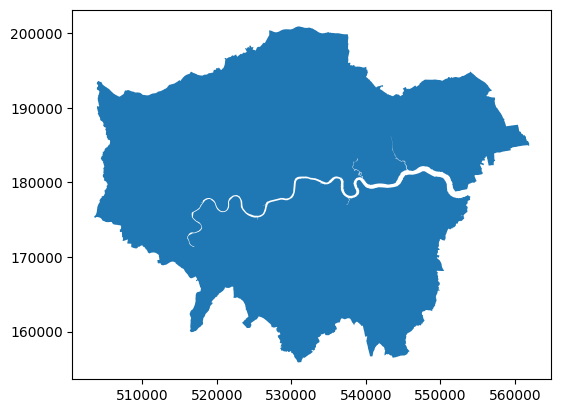

In [189]:
london_shp = borough_shp.unary_union
london_shp = gpd.GeoDataFrame(geometry=[london_shp], crs=27700)
london_shp.to_file("data/statistical-gis-boundaries-london/ESRI/london_boundary.shp")
london_shp.plot()

In [190]:
od_count = pd.read_feather('data/od_count.feather')
od_count_weekday = pd.read_feather('data/od_count_weekday.feather')
od_count_weekend = pd.read_feather('data/od_count_weekend.feather')

In [191]:
od_count

,MSOA11CD_origin,MSOA11CD_des,count
0,E02000001,E02000001,10306
1,E02000001,E02000002,4
2,E02000001,E02000003,48
3,E02000001,E02000004,8
4,E02000001,E02000005,2
...,...,...,...
185019,E02006931,E02006927,54
185020,E02006931,E02006928,432
185021,E02006931,E02006929,132
185022,E02006931,E02006930,183


In [192]:
MSOA_origin_PDFs_inverse_matrix = pd.read_csv('output/MSOA_origin_PDFs_inverse_matrix.csv', index_col=0)

In [193]:
msoa_shp.head(2)

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."


In [194]:
MSOA_origin_PDFs_inverse_matrix

,E02000977,E02000001,E02000972,E02000524,E02000970,E02000193,E02000476,E02006801,E02000726,E02000606,...,E02006918,E02000390,E02000348,E02000734,E02000356,E02000869,E02000380,E02000414,E02000432,E02000347
E02000977,0.000000,0.129910,0.055341,0.238121,0.144465,0.125709,0.136024,0.083737,0.133419,0.160941,...,0.176415,0.199415,0.133081,0.101850,0.179499,0.140717,0.186532,0.119798,0.147972,0.222843
E02000001,0.129910,0.000000,0.088525,0.176051,0.041440,0.047632,0.063861,0.091307,0.097305,0.067910,...,0.098639,0.118605,0.109741,0.107371,0.097509,0.125000,0.099292,0.127079,0.090457,0.120918
E02000972,0.055341,0.088525,0.000000,0.213712,0.099373,0.089874,0.098540,0.071239,0.108586,0.116199,...,0.145207,0.168449,0.115484,0.088750,0.147272,0.123700,0.145772,0.113547,0.117491,0.181976
E02000524,0.238121,0.176051,0.213712,0.000000,0.176650,0.180819,0.183114,0.166173,0.148845,0.196053,...,0.124759,0.134694,0.140546,0.176137,0.094823,0.114270,0.204503,0.140501,0.119046,0.119913
E02000970,0.144465,0.041440,0.099373,0.176650,0.000000,0.051997,0.067794,0.110542,0.111289,0.060399,...,0.106675,0.116681,0.119245,0.121451,0.100328,0.128891,0.090998,0.137126,0.087879,0.112230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000869,0.140717,0.125000,0.123700,0.114270,0.128891,0.126079,0.143105,0.089259,0.112404,0.162599,...,0.122115,0.141853,0.095199,0.110262,0.096326,0.000000,0.179548,0.074306,0.067078,0.142224
E02000380,0.186532,0.099292,0.145772,0.204503,0.090998,0.126173,0.089799,0.147573,0.118673,0.076703,...,0.119031,0.156073,0.142814,0.140022,0.134166,0.179548,0.000000,0.163913,0.152152,0.141745
E02000414,0.119798,0.127079,0.113547,0.140501,0.137126,0.134867,0.125577,0.065507,0.082674,0.154366,...,0.118770,0.151720,0.081250,0.087301,0.113325,0.074306,0.163913,0.000000,0.107704,0.170195
E02000432,0.147972,0.090457,0.117491,0.119046,0.087879,0.078744,0.105351,0.092376,0.101637,0.119664,...,0.087370,0.090551,0.082527,0.104204,0.060029,0.067078,0.152152,0.107704,0.000000,0.092163


In [195]:
# # add a new column 'similarity_network' to the msoa_shp
# msoa_shp['similarity_network'] = 0.00

# # calculate the similarity of each msoa, based on the count of trips in od_count
# for i in range(len(msoa_shp)):
#     msoa = msoa_shp.iloc[i].MSOA11CD
#     msoa_shp.loc[i, 'similarity_network'] = MSOA_origin_PDFs_inverse_matrix[msoa].mean()
    
# msoa_shp.head(2)

In [196]:
# # add a new column 'similarity_network' to the msoa_shp
# msoa_shp['similarity_network'] = 0.00

# # calculate the similarity between each MSOA and the network based on the OD count
# for i in range(MSOA_origin_PDFs_inverse_matrix.shape[0]):
#     for j in range(MSOA_origin_PDFs_inverse_matrix.shape[1]):
#         msoa_shp.loc[msoa_shp['MSOA11CD'] == MSOA_origin_PDFs_inverse_matrix.index[i], 'similarity_network'] = MSOA_origin_PDFs_inverse_matrix.iloc[i, j]

# msoa_shp.head(2)

## construct the network

In [197]:
if not isinstance(msoa_shp, gpd.GeoDataFrame):
    msoa_shp = gpd.GeoDataFrame(msoa_shp, geometry='geometry')

# 计算每个MSOA的中心点
msoa_shp['centroid'] = msoa_shp.geometry.centroid
msoa_shp['x'] = msoa_shp.centroid.x
msoa_shp['y'] = msoa_shp.centroid.y

# 创建一个包含地理信息的字典
msoa_coords = msoa_shp.set_index('MSOA11CD')[['x', 'y']].to_dict('index')

# 创建网络图，包含地理信息
G = nx.from_pandas_edgelist(od_count, 'MSOA11CD_origin', 'MSOA11CD_des', ['count'], create_using=nx.DiGraph())

# 添加节点属性（地理坐标）
nx.set_node_attributes(G, msoa_coords)

# 添加边的地理距离属性
for u, v, data in G.edges(data=True):
    if u in msoa_coords and v in msoa_coords:
        data['geo_distance'] = ((msoa_coords[u]['x'] - msoa_coords[v]['x'])**2 + 
                                (msoa_coords[u]['y'] - msoa_coords[v]['y'])**2)**0.5

# 打印一些基本信息来验证
print(f"节点数量: {G.number_of_nodes()}")
print(f"边的数量: {G.number_of_edges()}")
print("\n节点属性示例:")
print(list(G.nodes(data=True))[:2])
print("\n边属性示例:")
print(list(G.edges(data=True))[:2])

# 可选：使用地理距离作为边权重
# nx.set_edge_attributes(G, {(u, v): {'weight': d['geo_distance']} for u, v, d in G.edges(data=True)})

# 可选：计算考虑地理距离的PageRank
# geo_pagerank = nx.pagerank(G, weight='geo_distance')

# 可选：将新的PageRank值添加到msoa_shp
# msoa_shp['geo_pagerank'] = msoa_shp['MSOA11CD'].map(geo_pagerank)

节点数量: 983
边的数量: 185024

节点属性示例:
[('E02000001', {'x': 532482.7039370309, 'y': 181269.30993319198}), ('E02000002', {'x': 548312.9145429021, 'y': 189881.37850049566})]

边属性示例:
[('E02000001', 'E02000001', {'count': 10306, 'geo_distance': 0.0}), ('E02000001', 'E02000002', {'count': 4, 'geo_distance': 18021.19010593306})]


In [198]:
G_weekday = nx.from_pandas_edgelist(od_count_weekday, 'MSOA11CD_origin', 'MSOA11CD_des', ['count'], create_using=nx.DiGraph())
nx.set_node_attributes(G_weekday, msoa_coords)
for u, v, data in G_weekday.edges(data=True):
    if u in msoa_coords and v in msoa_coords:
        data['geo_distance'] = ((msoa_coords[u]['x'] - msoa_coords[v]['x'])**2 + 
                                (msoa_coords[u]['y'] - msoa_coords[v]['y'])**2)**0.5
        
G_weekend = nx.from_pandas_edgelist(od_count_weekend, 'MSOA11CD_origin', 'MSOA11CD_des', ['count'], create_using=nx.DiGraph())
nx.set_node_attributes(G_weekend, msoa_coords)
for u, v, data in G_weekend.edges(data=True):
    if u in msoa_coords and v in msoa_coords:
        data['geo_distance'] = ((msoa_coords[u]['x'] - msoa_coords[v]['x'])**2 + 
                                (msoa_coords[u]['y'] - msoa_coords[v]['y'])**2)**0.5

In [199]:
def plot_network_basic(G, msoa_shp, figsize=(12, 10)):
    """
    基本网络图绘制
    """
    plt.figure(figsize=figsize)
    
    # 使用地理坐标作为节点位置
    pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='blue', alpha=0.6)
    
    # 绘制边（仅绘制权重最大的前10%的边，以避免图形过于混乱）
    edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    weights = [d['count'] for (u, v, d) in G.edges(data=True)]
    
    # 选择权重最大的前10%的边
    threshold = sorted(weights, reverse=True)[int(len(weights) * 0.1)]
    edge_list = [(u, v) for (u, v, d) in G.edges(data=True) if d['count'] >= threshold]
    
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='gray', alpha=0.4, arrows=True, arrowsize=10)
    
    plt.title("MSOA Network - Basic Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_network_geo(G, msoa_shp, figsize=(15, 12)):
    """
    地理背景的网络图绘制
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # 绘制MSOA边界
    msoa_shp.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.5, alpha=0.5)
    
    # 使用地理坐标作为节点位置
    pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}
    
    # 计算节点大小（基于度中心性）
    degree = dict(G.degree())
    node_size = [v * 20 for v in degree.values()]
    
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='red', alpha=0.6, ax=ax)
    
    # 绘制边（仅绘制权重最大的前5%的边）
    edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    weights = [d['count'] for (u, v, d) in G.edges(data=True)]
    
    threshold = sorted(weights, reverse=True)[int(len(weights) * 0.05)]
    edge_list = [(u, v) for (u, v, d) in G.edges(data=True) if d['count'] >= threshold]
    
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, edge_color='blue', alpha=0.4, arrows=True, arrowsize=10, ax=ax)
    
    plt.title("MSOA Network with Geographic Context")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

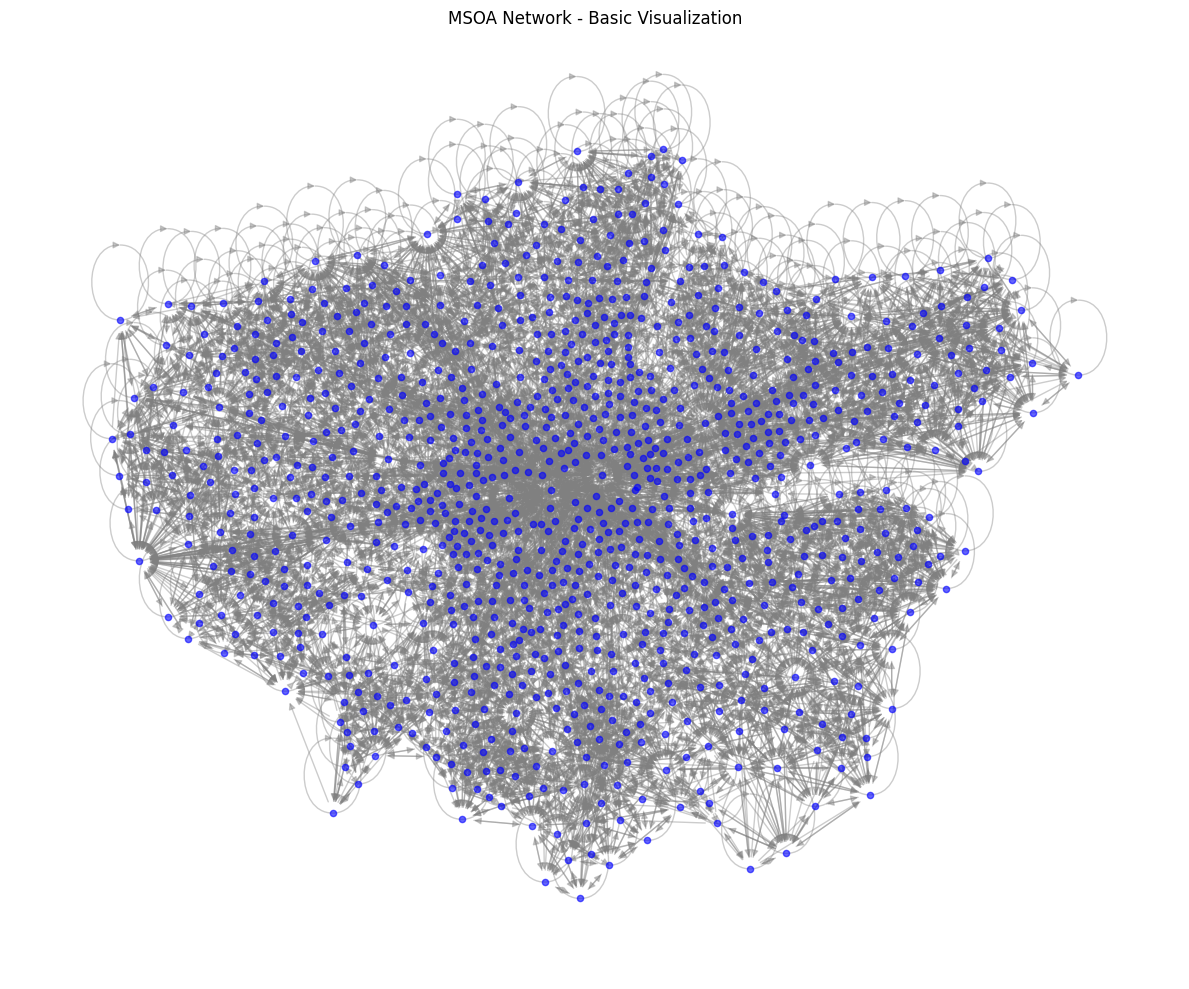

In [200]:
plot_network_basic(G, msoa_shp)
# plot_network_geo(G, msoa_shp)

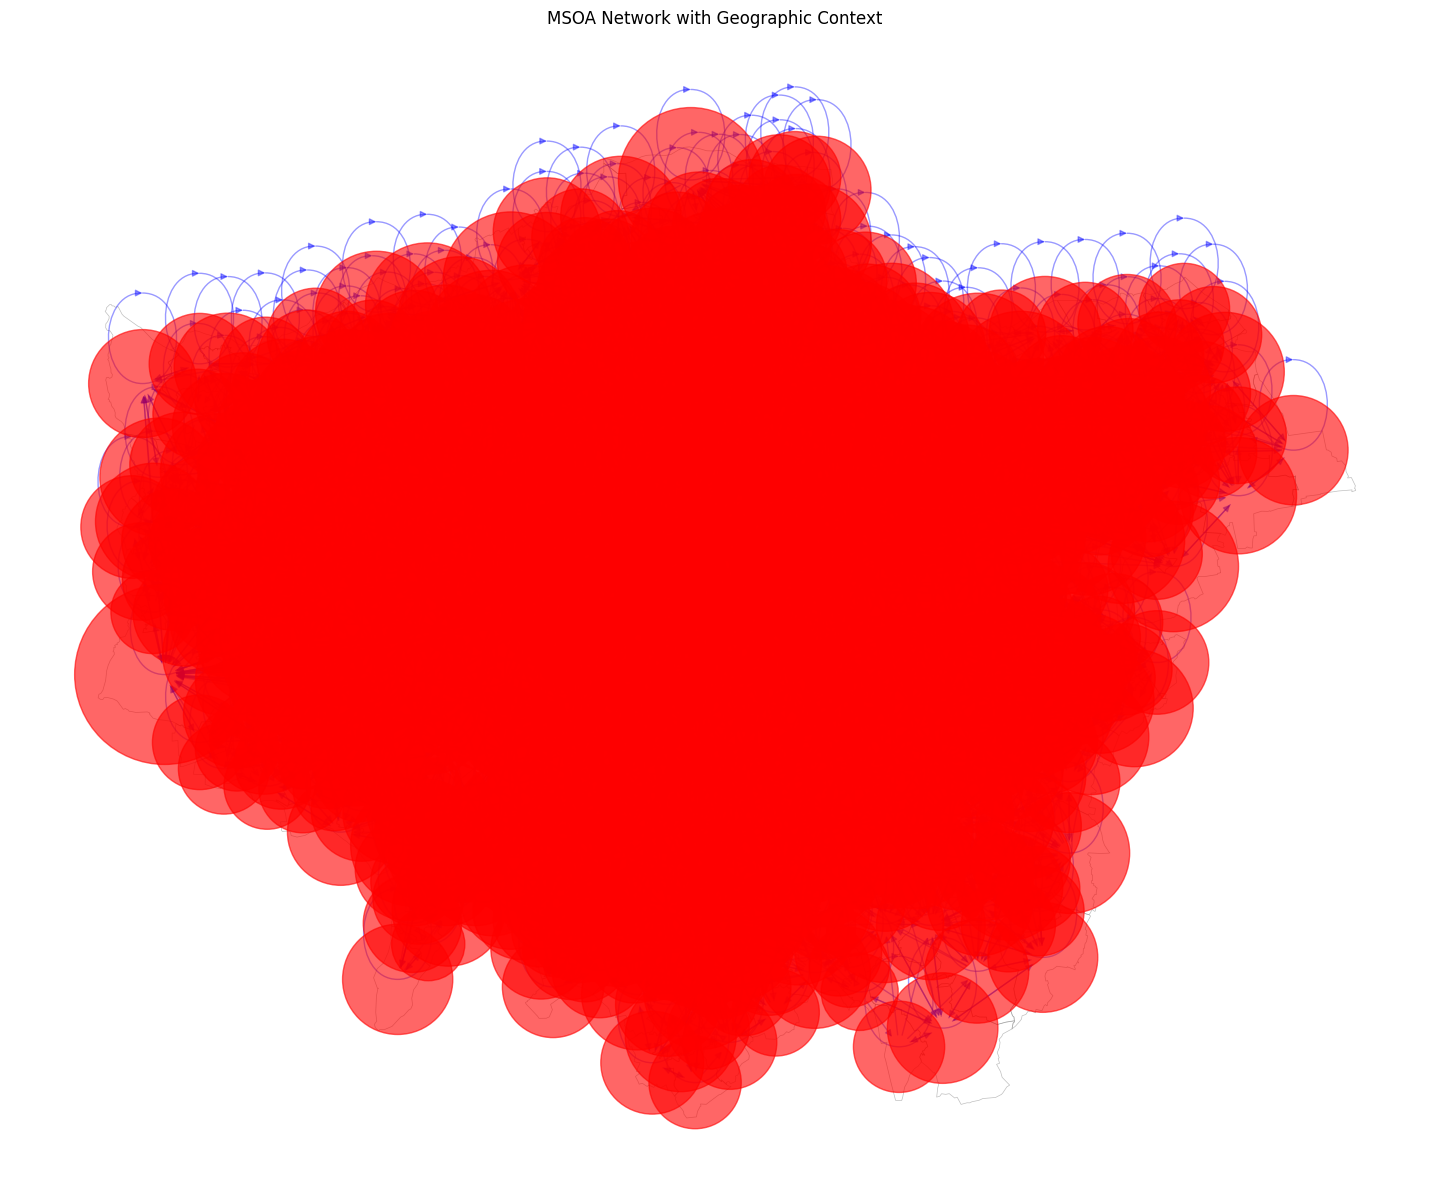

In [201]:
plot_network_geo(G, msoa_shp)

In [202]:
def plot_mobility_density_heatmap(G, msoa_shp, resolution=100, bandwidth='scott', figsize=(15, 12)):
    """
    
    参数:
    - G: NetworkX图对象，包含通勤数据
    - msoa_shp: GeoDataFrame，包含MSOA的地理信息
    - resolution: 栅格分辨率
    - bandwidth: KDE带宽，可以是数值或'scott'/'silverman'方法
    - figsize: 图形大小
    """
    # 提取所有边的权重和坐标
    weights = []
    coords = []
    for (u, v, d) in G.edges(data=True):
        weight = d['count']
        start = (G.nodes[u]['x'], G.nodes[u]['y'])
        end = (G.nodes[v]['x'], G.nodes[v]['y'])
        weights.extend([weight, weight])
        coords.extend([start, end])
    
    coords = np.array(coords)
    weights = np.array(weights)
    
    # 创建网格
    x_min, y_min, x_max, y_max = msoa_shp.total_bounds
    xi, yi = np.mgrid[x_min:x_max:resolution*1j, y_min:y_max:resolution*1j]
    
    # 计算密度
    kde = gaussian_kde(coords.T, weights=weights, bw_method=bandwidth)
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # 对密度值进行对数转换
    zi = np.log1p(zi)
    
    # 绘图
    fig, ax = plt.subplots(figsize=figsize)
    
    # 绘制MSOA边界
    london_shp.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.5, alpha=0.5)
    
    # 使用自定义颜色映射
    cmap = plt.cm.get_cmap('YlOrRd')
    vmin, vmax = np.percentile(zi, [5, 95])  # 使用5%和95%百分位数作为颜色范围
    
    # 绘制热图
    im = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
    
    # 添加颜色条
    cbar = plt.colorbar(im, ax=ax, label='Density')
    
    # 设置标题和隐藏坐标轴
    # plt.title("Mobility Density Heatmap")
    ax.set_axis_off()
    
    plt.tight_layout()
    plt.show()

C:\Users\dune\AppData\Local\Temp\ipykernel_16708\3456190492.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


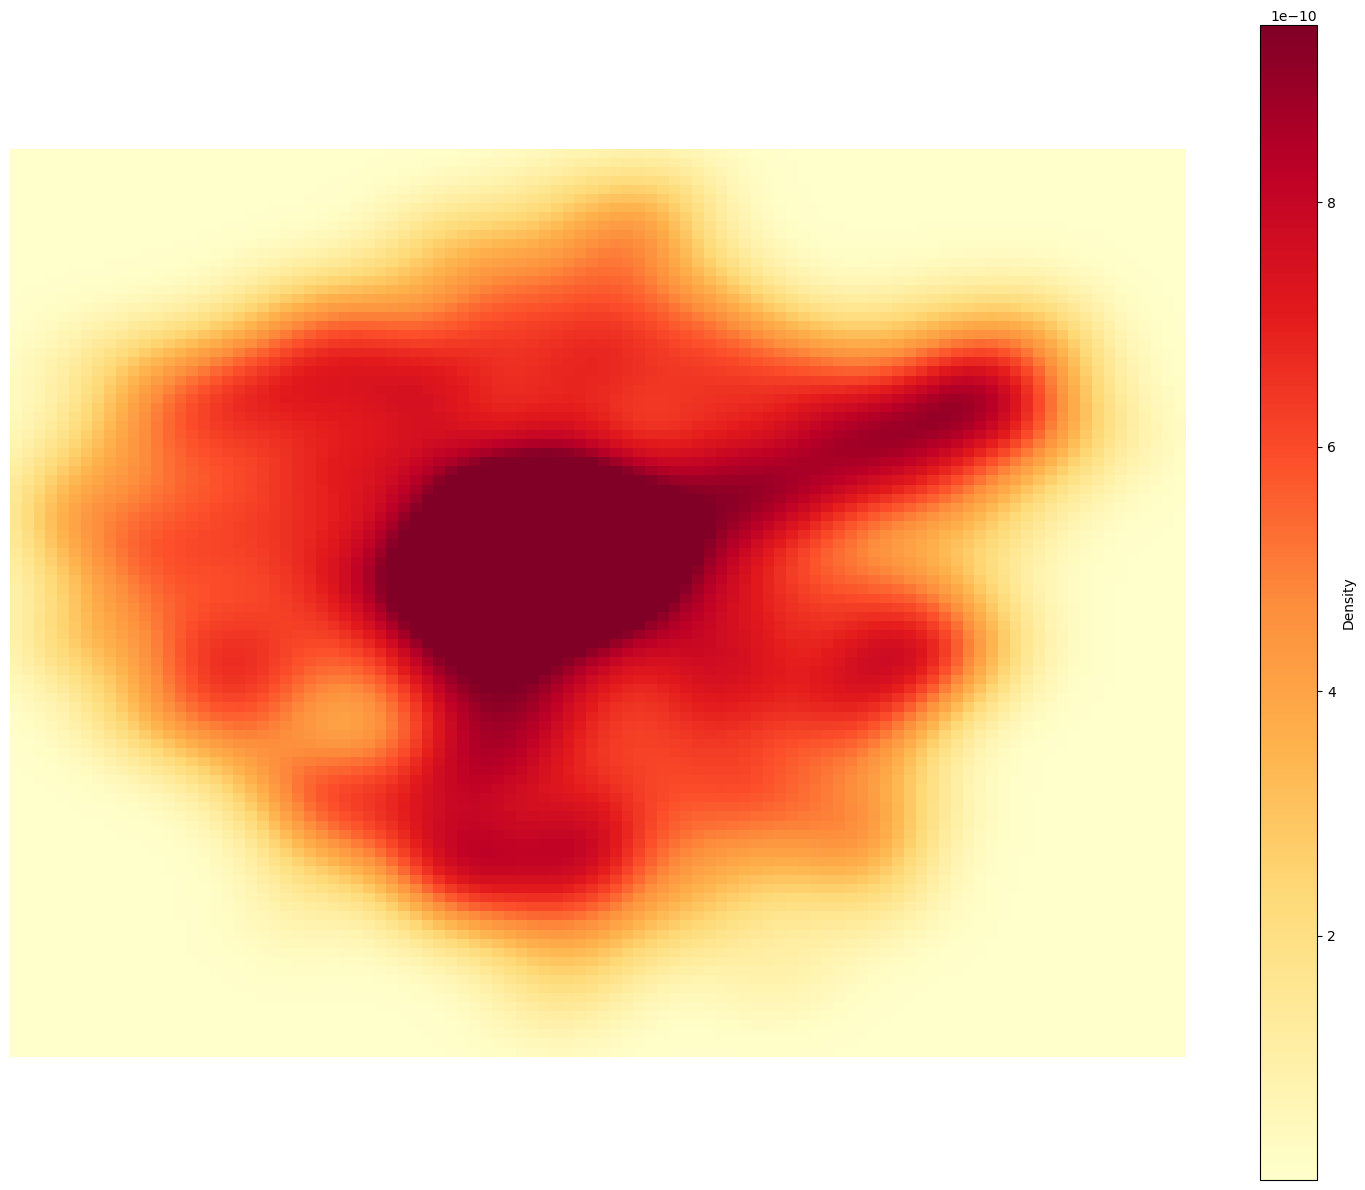

In [203]:

mobility_heatmap = plot_mobility_density_heatmap(G, msoa_shp)

C:\Users\dune\AppData\Local\Temp\ipykernel_16708\3456190492.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


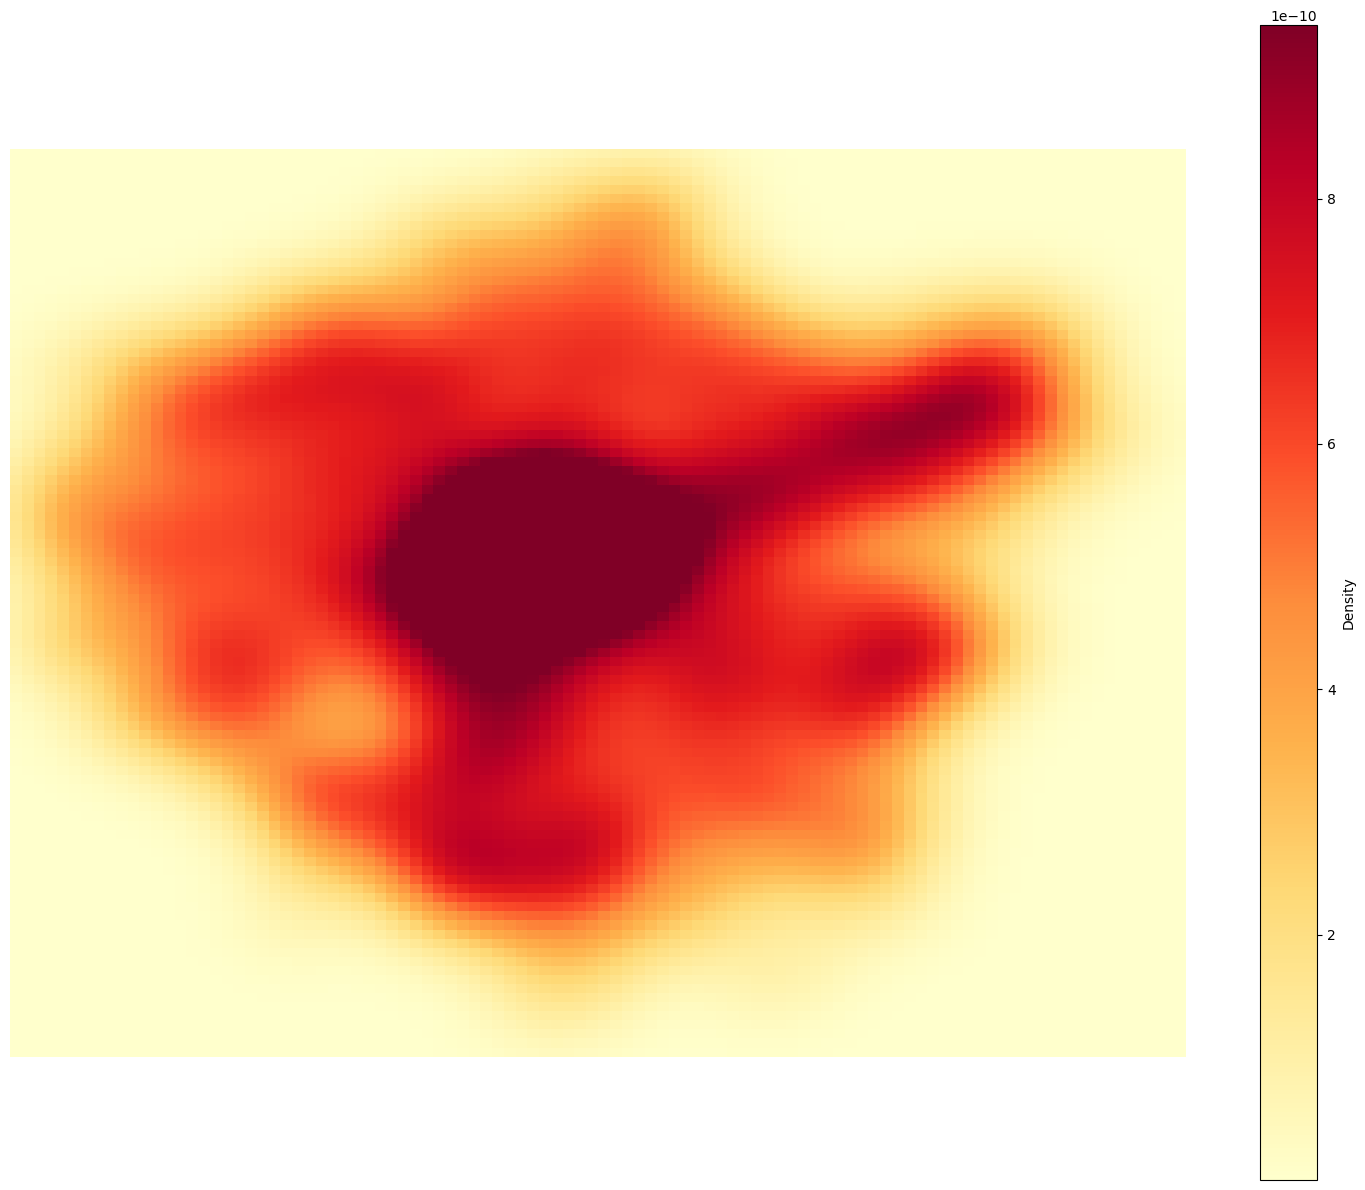

In [204]:
mobility_heatmap_weekday = plot_mobility_density_heatmap(G_weekday, msoa_shp)

C:\Users\dune\AppData\Local\Temp\ipykernel_16708\3456190492.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


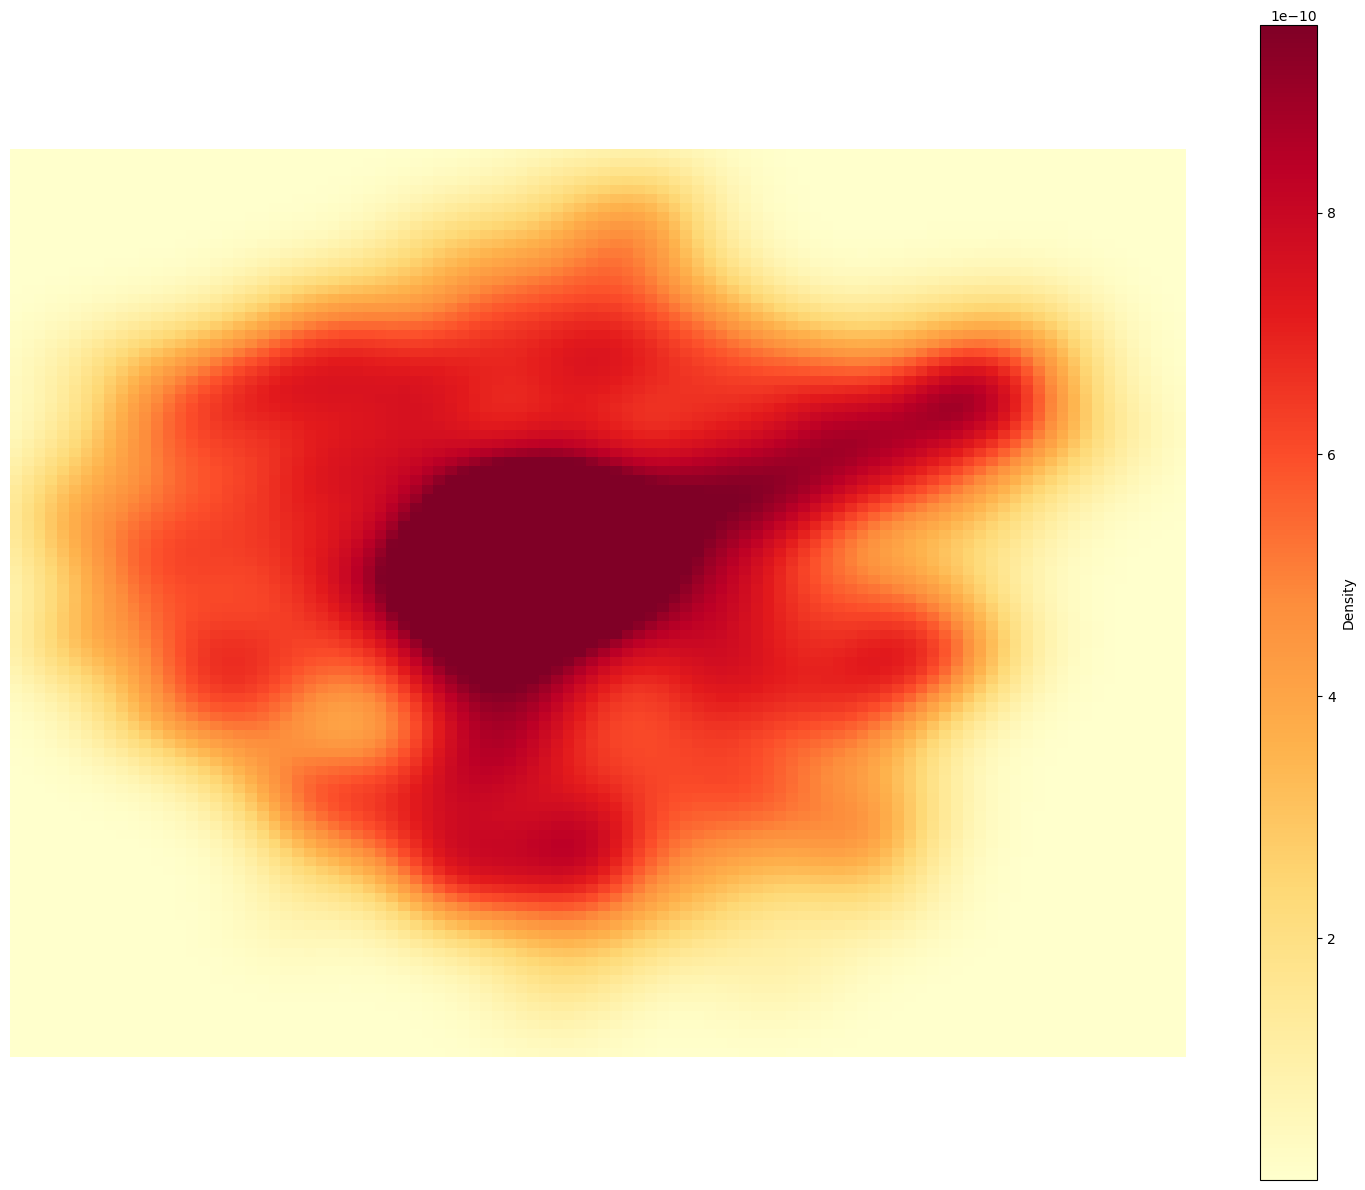

In [205]:
mobility_heatmap_weekend = plot_mobility_density_heatmap(G_weekend, msoa_shp)

C:\Users\dune\AppData\Local\Temp\ipykernel_16708\3699069574.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


AttributeError: module 'matplotlib.pyplot' has no attribute 'patheffects'

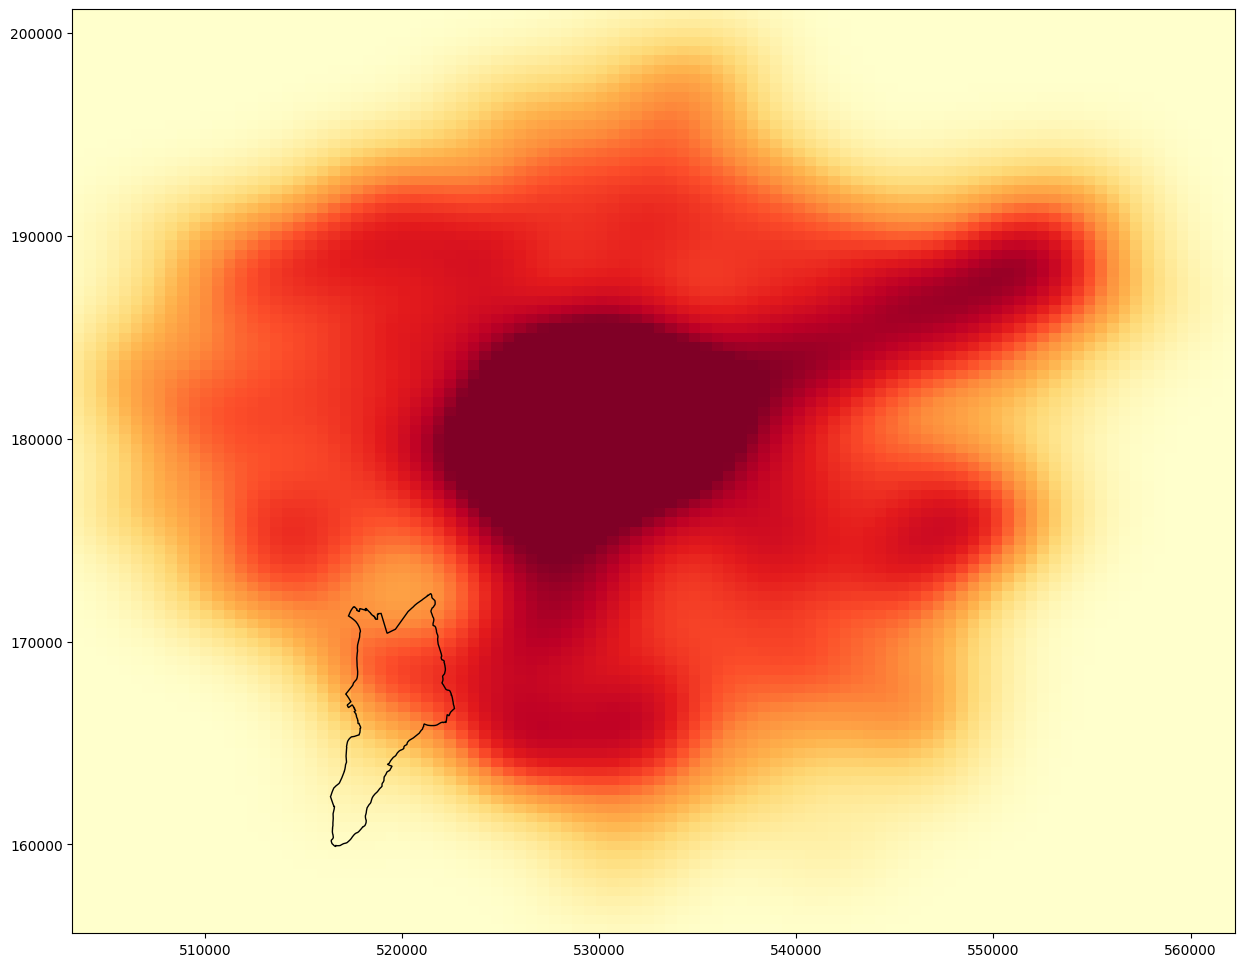

In [206]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Polygon

def plot_borough_commute_density_heatmap(G, msoa_shp, borough_shp, resolution=100, bandwidth='scott', figsize=(15, 12)):
    """
    绘制基于Borough边界的通勤密度热图
    
    参数:
    - G: NetworkX图对象，包含通勤数据
    - msoa_shp: GeoDataFrame，包含MSOA的地理信息（用于计算密度）
    - borough_shp: GeoDataFrame，包含Borough的地理信息和NAME列
    - resolution: 栅格分辨率
    - bandwidth: KDE带宽，可以是数值或'scott'/'silverman'方法
    - figsize: 图形大小
    """
    # 提取所有边的权重和坐标
    weights = []
    coords = []
    for (u, v, d) in G.edges(data=True):
        weight = d['count']
        start = (G.nodes[u]['x'], G.nodes[u]['y'])
        end = (G.nodes[v]['x'], G.nodes[v]['y'])
        weights.extend([weight, weight])
        coords.extend([start, end])
    
    coords = np.array(coords)
    weights = np.array(weights)
    
    # 创建网格
    x_min, y_min, x_max, y_max = borough_shp.total_bounds
    xi, yi = np.mgrid[x_min:x_max:resolution*1j, y_min:y_max:resolution*1j]
    
    # 计算密度
    kde = gaussian_kde(coords.T, weights=weights, bw_method=bandwidth)
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
    
    # 对密度值进行对数转换
    zi = np.log1p(zi)
    
    # 绘图
    fig, ax = plt.subplots(figsize=figsize)
    
    # 使用自定义颜色映射
    cmap = plt.cm.get_cmap('YlOrRd')
    vmin, vmax = np.percentile(zi, [5, 95])  # 使用5%和95%百分位数作为颜色范围
    
    # 绘制热图
    im = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
    
    # 绘制Borough边界和添加标签
    for idx, row in borough_shp.iterrows():
        geom = row.geometry
        if geom.geom_type == 'MultiPolygon':
            for polygon in geom:
                ax.add_patch(PathPatch(Path(polygon.exterior.coords), facecolor='none', edgecolor='black', lw=1))
        elif geom.geom_type == 'Polygon':
            ax.add_patch(PathPatch(Path(geom.exterior.coords), facecolor='none', edgecolor='black', lw=1))
        
        # 添加Borough名称标签
        centroid = geom.centroid
        ax.annotate(row['NAME'], (centroid.x, centroid.y), ha='center', va='center', 
                    fontsize=8, fontweight='bold', color='black', 
                    path_effects=[plt.patheffects.withStroke(linewidth=2, foreground='white')])
    
    # 设置裁剪
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 添加颜色条
    cbar = plt.colorbar(im, ax=ax, label='Log(Commute Density + 1)')
    
    # 设置标题和隐藏坐标轴
    plt.title("Commute Density Heatmap (Borough Boundaries)")
    ax.set_axis_off()
    
    plt.tight_layout()
    plt.show()

plot_borough_commute_density_heatmap(G, msoa_shp, borough_shp)

## in out degree

In [ ]:
# 计算入度和出度
in_degree = dict(G.in_degree(weight='count'))
out_degree = dict(G.out_degree(weight='count'))

# calculate the in-degree entropy
in_degree_entropy = {node: 0 for node in G.nodes()}
for node in G.nodes():
    in_edges = G.in_edges(node, data=True)
    in_degree_sum = sum([data['count'] for _, _, data in in_edges])
    for _, _, data in in_edges:
        p = data['count'] / in_degree_sum
        in_degree_entropy[node] -= p * np.log(p)
       
# calculate the out-degree entropy
out_degree_entropy = {node: 0 for node in G.nodes()}
for node in G.nodes():
    out_edges = G.out_edges(node, data=True)
    out_degree_sum = sum([data['count'] for _, _, data in out_edges])
    for _, _, data in out_edges:
        p = data['count'] / out_degree_sum
        out_degree_entropy[node] -= p * np.log(p)
    
# calculate the total degree entropy
total_degree_entropy = {node: in_degree_entropy[node] + out_degree_entropy[node] for node in G.nodes()}
total_degree = {node: in_degree.get(node, 0) + out_degree.get(node, 0) for node in G.nodes()}

# add the results to msoa_shp
msoa_shp['in_degree_entropy'] = msoa_shp['MSOA11CD'].map(in_degree_entropy)
msoa_shp['out_degree_entropy'] = msoa_shp['MSOA11CD'].map(out_degree_entropy)
msoa_shp['total_degree_entropy'] = msoa_shp['MSOA11CD'].map(total_degree_entropy)
msoa_shp['in_degree'] = msoa_shp['MSOA11CD'].map(in_degree)
msoa_shp['out_degree'] = msoa_shp['MSOA11CD'].map(out_degree)
msoa_shp['total_degree'] = msoa_shp['MSOA11CD'].map(total_degree)

# 归一化总度
max_degree = max(total_degree.values())
msoa_shp['normalized_degree'] = msoa_shp['total_degree'] / max_degree

In [ ]:
in_degree_weekday = dict(G_weekday.in_degree(weight='count'))
out_degree_weekday = dict(G_weekday.out_degree(weight='count'))

in_degree_entropy_weekday = {node: 0 for node in G_weekday.nodes()}
for node in G_weekday.nodes():
    in_edges = G_weekday.in_edges(node, data=True)
    in_degree_sum = sum([data['count'] for _, _, data in in_edges])
    for _, _, data in in_edges:
        p = data['count'] / in_degree_sum
        in_degree_entropy_weekday[node] -= p * np.log(p)
        
out_degree_entropy_weekday = {node: 0 for node in G_weekday.nodes()}
for node in G_weekday.nodes():
    out_edges = G_weekday.out_edges(node, data=True)
    out_degree_sum = sum([data['count'] for _, _, data in out_edges])
    for _, _, data in out_edges:
        p = data['count'] / out_degree_sum
        out_degree_entropy_weekday[node] -= p * np.log(p)
        
total_degree_entropy_weekday = {node: in_degree_entropy_weekday[node] + out_degree_entropy_weekday[node] for node in G_weekday.nodes()}
total_degree_weekday = {node: in_degree_weekday.get(node, 0) + out_degree_weekday.get(node, 0) for node in G_weekday.nodes()}
msoa_shp['in_degree_entropy_weekday'] = msoa_shp['MSOA11CD'].map(in_degree_entropy_weekday)
msoa_shp['out_degree_entropy_weekday'] = msoa_shp['MSOA11CD'].map(out_degree_entropy_weekday)
msoa_shp['total_degree_entropy_weekday'] = msoa_shp['MSOA11CD'].map(total_degree_entropy_weekday)
msoa_shp['in_degree_weekday'] = msoa_shp['MSOA11CD'].map(in_degree_weekday)
msoa_shp['out_degree_weekday'] = msoa_shp['MSOA11CD'].map(out_degree_weekday)
msoa_shp['total_degree_weekday'] = msoa_shp['MSOA11CD'].map(total_degree_weekday)
msoa_shp['normalized_degree_weekday'] = msoa_shp['total_degree_weekday'] / max_degree

in_degree_weekend = dict(G_weekend.in_degree(weight='count'))
out_degree_weekend = dict(G_weekend.out_degree(weight='count'))

in_degree_entropy_weekend = {node: 0 for node in G_weekend.nodes()}
for node in G_weekend.nodes():
    in_edges = G_weekend.in_edges(node, data=True)
    in_degree_sum = sum([data['count'] for _, _, data in in_edges])
    for _, _, data in in_edges:
        p = data['count'] / in_degree_sum
        in_degree_entropy_weekend[node] -= p * np.log(p)
        
out_degree_entropy_weekend = {node: 0 for node in G_weekend.nodes()}
for node in G_weekend.nodes():
    out_edges = G_weekend.out_edges(node, data=True)
    out_degree_sum = sum([data['count'] for _, _, data in out_edges])
    for _, _, data in out_edges:
        p = data['count'] / out_degree_sum
        out_degree_entropy_weekend[node] -= p * np.log(p)
        
total_degree_entropy_weekend = {node: in_degree_entropy_weekend[node] + out_degree_entropy_weekend[node] for node in G_weekend.nodes()}
total_degree_weekend = {node: in_degree_weekend.get(node, 0) + out_degree_weekend.get(node, 0) for node in G_weekend.nodes()}
msoa_shp['in_degree_entropy_weekend'] = msoa_shp['MSOA11CD'].map(in_degree_entropy_weekend)
msoa_shp['out_degree_entropy_weekend'] = msoa_shp['MSOA11CD'].map(out_degree_entropy_weekend)
msoa_shp['total_degree_entropy_weekend'] = msoa_shp['MSOA11CD'].map(total_degree_entropy_weekend)
msoa_shp['in_degree_weekend'] = msoa_shp['MSOA11CD'].map(in_degree_weekend)
msoa_shp['out_degree_weekend'] = msoa_shp['MSOA11CD'].map(out_degree_weekend)
msoa_shp['total_degree_weekend'] = msoa_shp['MSOA11CD'].map(total_degree_weekend)
msoa_shp['normalized_degree_weekend'] = msoa_shp['total_degree_weekend'] / max_degree


In [ ]:
msoa_shp.to_csv('output/similarity_network.csv')

## 基于流量的相似度

In [ ]:
from functools import partial
# 计算PageRank
pagerank = nx.pagerank(G, alpha=0.85, personalization=None, weight='count')
pagerank_weekday = nx.pagerank(G_weekday, alpha=0.85, personalization=None, weight='count')
pagerank_weekend = nx.pagerank(G_weekend, alpha=0.85, personalization=None, weight='count')

# 将PageRank结果添加到msoa_shp
msoa_shp['pagerank'] = msoa_shp['MSOA11CD'].map(pagerank)
msoa_shp['pagerank_weekday'] = msoa_shp['MSOA11CD'].map(pagerank_weekday)
msoa_shp['pagerank_weekend'] = msoa_shp['MSOA11CD'].map(pagerank_weekend)


In [ ]:

def calculate_flow_similarity(msoa1, msoa2):
    # 计算入流相似度
    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree'] - msoa_shp.loc[msoa2, 'in_degree']) / max(msoa_shp['in_degree'])
    
    # 计算出流相似度
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree'] - msoa_shp.loc[msoa2, 'out_degree']) / max(msoa_shp['out_degree'])
    
    # 计算PageRank相似度
    pr_sim = 1 - abs(msoa_shp.loc[msoa1, 'pagerank'] - msoa_shp.loc[msoa2, 'pagerank']) / max(msoa_shp['pagerank'])
    
    # 综合相似度
    return (in_sim + out_sim + pr_sim) / 3

# 选择PageRank排名前N的MSOA（例如前10%）
N = int(len(msoa_shp) * 0.1)
top_msoas = msoa_shp.nlargest(N, 'pagerank')['MSOA11CD'].tolist()
top_msoas_weekday = msoa_shp.nlargest(N, 'pagerank_weekday')['MSOA11CD'].tolist()
top_msoas_weekend = msoa_shp.nlargest(N, 'pagerank_weekend')['MSOA11CD'].tolist()


In [ ]:
def calculate_flow_similarity(msoa1, msoa2, msoa_shp):
    """
    计算两个MSOA之间的流量相似度
    """
    if msoa1 not in msoa_shp.index or msoa2 not in msoa_shp.index:
        return np.nan

    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree'] - msoa_shp.loc[msoa2, 'in_degree']) / max(msoa_shp['in_degree'])
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree'] - msoa_shp.loc[msoa2, 'out_degree']) / max(msoa_shp['out_degree'])
    total_sim = 1 - abs(msoa_shp.loc[msoa1, 'total_degree'] - msoa_shp.loc[msoa2, 'total_degree']) / max(msoa_shp['total_degree'])
    
    return (in_sim + out_sim + total_sim) / 3

def safe_mean(values):
    """
    安全计算平均值，忽略 NaN 值
    """
    return np.nanmean(values)

def calculate_top_flow_similarity(msoa_shp, top_percentage=0.1):
    # 确保 'total_degree' 列存在
    if 'total_degree' not in msoa_shp.columns:
        msoa_shp['total_degree'] = msoa_shp['in_degree'] + msoa_shp['out_degree']
    
    # 选择排名前N的MSOA
    N = int(len(msoa_shp) * top_percentage)
    top_msoas = msoa_shp.nlargest(N, 'total_degree').index.tolist()
    
    # 创建一个部分应用的函数，固定 msoa_shp 参数
    calc_similarity = partial(calculate_flow_similarity, msoa_shp=msoa_shp)
    
    # 为每个MSOA计算与顶级MSOA的平均相似度
    def calculate_similarity_for_row(row):
        similarities = [calc_similarity(row.name, top_msoa) 
                        for top_msoa in top_msoas if top_msoa != row.name]
        return safe_mean(similarities)
    
    msoa_shp['top_flow_similarity'] = msoa_shp.apply(calculate_similarity_for_row, axis=1)
    
    return msoa_shp


msoa_shp = msoa_shp.set_index('MSOA11CD')  # 确保MSOA11CD是索引
msoa_shp = calculate_top_flow_similarity(msoa_shp)


In [158]:


def calculate_flow_similarity(msoa1, msoa2, msoa_shp):
    """
    计算两个MSOA之间的流量相似度
    """
    if msoa1 not in msoa_shp.index or msoa2 not in msoa_shp.index:
        return np.nan

    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree'] - msoa_shp.loc[msoa2, 'in_degree']) / max(msoa_shp['in_degree'])
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree'] - msoa_shp.loc[msoa2, 'out_degree']) / max(msoa_shp['out_degree'])
    pr_sim = 1 - abs(msoa_shp.loc[msoa1, 'pagerank'] - msoa_shp.loc[msoa2, 'pagerank']) / max(msoa_shp['pagerank'])
    
    return (in_sim + out_sim + pr_sim) / 3

def safe_mean(values):
    """
    安全计算平均值，忽略 NaN 值
    """
    return np.nanmean(values)

def calculate_pagerank_top_similarity(G, msoa_shp, top_percentage=0.1):
    """
    基于PageRank计算顶级MSOA的流量相似度
    
    参数:
    G : networkx.Graph
        包含MSOA通勤数据的网络图
    msoa_shp : pandas.DataFrame
        包含MSOA数据的DataFrame，索引为MSOA11CD
    top_percentage : float
        选择的顶级MSOA的百分比
    
    返回:
    pandas.DataFrame
        更新后的msoa_shp，包含新的'pagerank'和'top_pr_similarity'列
    """
    # 计算PageRank
    pagerank = nx.pagerank(G, weight='count')
    
    # 将PageRank值添加到msoa_shp
    msoa_shp['pagerank'] = pd.Series(pagerank)
    
    # 选择排名前N的MSOA
    N = int(len(msoa_shp) * top_percentage)
    top_msoas = msoa_shp.nlargest(N, 'pagerank').index.tolist()
    
    # 创建一个部分应用的函数，固定 msoa_shp 参数
    calc_similarity = partial(calculate_flow_similarity, msoa_shp=msoa_shp)
    
    # 为每个MSOA计算与顶级MSOA的平均相似度
    def calculate_similarity_for_row(row):
        similarities = [calc_similarity(row.name, top_msoa) 
                        for top_msoa in top_msoas if top_msoa != row.name]
        return safe_mean(similarities)
    
    msoa_shp['top_pr_similarity'] = msoa_shp.apply(calculate_similarity_for_row, axis=1)
    
    return msoa_shp



In [159]:
msoa_shp = calculate_pagerank_top_similarity(G, msoa_shp)
print(msoa_shp[['pagerank', 'top_pr_similarity']].head())

           pagerank  top_pr_similarity
MSOA11CD                              
E02000001  0.004587           0.376945
E02000002  0.000709           0.839007
E02000003  0.001534           0.928380
E02000004  0.000800           0.849044
E02000005  0.001176           0.903113


In [166]:
msoa_shp.to_csv('output/temp2.csv')

In [180]:
msoa_shp = pd.read_csv('output/temp2.csv')

weekend

In [181]:
def calculate_flow_similarity(msoa1, msoa2, msoa_shp):
    """
    计算两个MSOA之间的流量相似度
    """
    if msoa1 not in msoa_shp.index or msoa2 not in msoa_shp.index:
        return np.nan

    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree_weekend'] - msoa_shp.loc[msoa2, 'in_degree_weekend']) / max(msoa_shp['in_degree_weekend'])
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree_weekend'] - msoa_shp.loc[msoa2, 'out_degree_weekend']) / max(msoa_shp['out_degree_weekend'])
    pr_sim = 1 - abs(msoa_shp.loc[msoa1, 'pagerank_weekend'] - msoa_shp.loc[msoa2, 'pagerank_weekend']) / max(msoa_shp['pagerank_weekend'])
    
    return (in_sim + out_sim + pr_sim) / 3

def safe_mean(values):
    """
    安全计算平均值，忽略 NaN 值
    """
    return np.nanmean(values)

def calculate_top_flow_similarity(msoa_shp, top_percentage=0.1):
    # 确保 'total_degree' 列存在
    if 'total_degree_weekend' not in msoa_shp.columns:
        msoa_shp['total_degree_weekend'] = msoa_shp['in_degree_weekend'] + msoa_shp['out_degree_weekend']
    
    # 选择排名前N的MSOA
    N = int(len(msoa_shp) * top_percentage)
    top_msoas = msoa_shp.nlargest(N, 'total_degree_weekend').index.tolist()
    
    # 创建一个部分应用的函数，固定 msoa_shp 参数
    calc_similarity = partial(calculate_flow_similarity, msoa_shp=msoa_shp)
    
    # 为每个MSOA计算与顶级MSOA的平均相似度
    def calculate_similarity_for_row(row):
        similarities = [calc_similarity(row.name, top_msoa) 
                        for top_msoa in top_msoas if top_msoa != row.name]
        return safe_mean(similarities)
    
    msoa_shp['top_flow_similarity_weekend'] = msoa_shp.apply(calculate_similarity_for_row, axis=1)
    
    return msoa_shp


msoa_shp = msoa_shp.set_index('MSOA11CD')  # 确保MSOA11CD是索引
msoa_shp = calculate_top_flow_similarity(msoa_shp)

def calculate_flow_similarity(msoa1, msoa2, msoa_shp):
    """
    计算两个MSOA之间的流量相似度
    """
    if msoa1 not in msoa_shp.index or msoa2 not in msoa_shp.index:
        return np.nan

    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree_weekend'] - msoa_shp.loc[msoa2, 'in_degree_weekend']) / max(msoa_shp['in_degree_weekend'])
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree_weekend'] - msoa_shp.loc[msoa2, 'out_degree_weekend']) / max(msoa_shp['out_degree_weekend'])
    pr_sim = 1 - abs(msoa_shp.loc[msoa1, 'pagerank_weekend'] - msoa_shp.loc[msoa2, 'pagerank_weekend']) / max(msoa_shp['pagerank_weekend'])
    
    return (in_sim + out_sim + pr_sim) / 3

def safe_mean(values):
    """
    安全计算平均值，忽略 NaN 值
    """
    return np.nanmean(values)

def calculate_pagerank_top_similarity(G, msoa_shp, top_percentage=0.1):
    """
    基于PageRank计算顶级MSOA的流量相似度
    
    参数:
    G : networkx.Graph
        包含MSOA通勤数据的网络图
    msoa_shp : pandas.DataFrame
        包含MSOA数据的DataFrame，索引为MSOA11CD
    top_percentage : float
        选择的顶级MSOA的百分比
    
    返回:
    pandas.DataFrame
        更新后的msoa_shp，包含新的'pagerank'和'top_pr_similarity'列
    """
    # 计算PageRank
    pagerank_weekend = nx.pagerank(G_weekend, weight='count')
    
    # 将PageRank值添加到msoa_shp
    msoa_shp['pagerank_weekend'] = pd.Series(pagerank_weekend)
    
    # 选择排名前N的MSOA
    N = int(len(msoa_shp) * top_percentage)
    top_msoas = msoa_shp.nlargest(N, 'pagerank_weekend').index.tolist()
    
    # 创建一个部分应用的函数，固定 msoa_shp 参数
    calc_similarity = partial(calculate_flow_similarity, msoa_shp=msoa_shp)
    
    # 为每个MSOA计算与顶级MSOA的平均相似度
    def calculate_similarity_for_row(row):
        similarities = [calc_similarity(row.name, top_msoa) 
                        for top_msoa in top_msoas if top_msoa != row.name]
        return safe_mean(similarities)
    
    msoa_shp['top_pr_similarity_weekend'] = msoa_shp.apply(calculate_similarity_for_row, axis=1)
    
    return msoa_shp

msoa_shp = calculate_pagerank_top_similarity(G, msoa_shp)
print(msoa_shp[['pagerank_weekend', 'top_pr_similarity_weekend']].head())


           pagerank_weekend  top_pr_similarity_weekend
MSOA11CD                                              
E02000001          0.003893                   0.736239
E02000002          0.000801                   0.882643
E02000003          0.001568                   0.940969
E02000004          0.000798                   0.878889
E02000005          0.001061                   0.910589


In [182]:
msoa_shp

,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,...,normalized_degree_weekend,pagerank,top_pr_similarity,pagerank_weekday,pagerank_weekend,top_flow_similarity,top_flow_similarity_weekday,top_pr_similarity_weekday,top_flow_similarity_weekend,top_pr_similarity_weekend
MSOA11CD,,,,,,,,,,,,,,,,,,,,,
E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,...,0.132143,0.004587,0.376945,0.004778,0.003893,0.335838,0.225137,0.273009,0.736415,0.736239
E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,...,0.024877,0.000709,0.839007,0.000680,0.000801,0.865249,0.859439,0.828485,0.883005,0.882643
E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,...,0.043735,0.001534,0.928380,0.001523,0.001568,0.939351,0.940320,0.927214,0.942167,0.940969
E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,...,0.022768,0.000800,0.849044,0.000798,0.000798,0.871100,0.870641,0.844728,0.878831,0.878889
E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,...,0.034544,0.001176,0.903113,0.001214,0.001061,0.928981,0.932773,0.904792,0.913818,0.910589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,...,0.043473,0.001890,0.932368,0.001858,0.001988,0.936501,0.934351,0.930987,0.943942,0.945249
E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,...,0.020058,0.000685,0.822952,0.000676,0.000719,0.842997,0.836119,0.812850,0.869049,0.868997
E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,...,0.080126,0.002034,0.912550,0.001868,0.002581,0.918205,0.933932,0.924631,0.886788,0.886612


In [183]:
msoa_shp.to_csv('output/similarity_network.csv')


In [184]:
msoa_shp = pd.read_csv('output/similarity_network.csv')


In [185]:
msoa_shp

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,...,normalized_degree_weekend,pagerank,top_pr_similarity,pagerank_weekday,pagerank_weekend,top_flow_similarity,top_flow_similarity_weekday,top_pr_similarity_weekday,top_flow_similarity_weekend,top_pr_similarity_weekend
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,...,0.132143,0.004587,0.376945,0.004778,0.003893,0.335838,0.225137,0.273009,0.736415,0.736239
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,...,0.024877,0.000709,0.839007,0.000680,0.000801,0.865249,0.859439,0.828485,0.883005,0.882643
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,...,0.043735,0.001534,0.928380,0.001523,0.001568,0.939351,0.940320,0.927214,0.942167,0.940969
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,...,0.022768,0.000800,0.849044,0.000798,0.000798,0.871100,0.870641,0.844728,0.878831,0.878889
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,...,0.034544,0.001176,0.903113,0.001214,0.001061,0.928981,0.932773,0.904792,0.913818,0.910589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,...,0.043473,0.001890,0.932368,0.001858,0.001988,0.936501,0.934351,0.930987,0.943942,0.945249
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,...,0.020058,0.000685,0.822952,0.000676,0.000719,0.842997,0.836119,0.812850,0.869049,0.868997
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,...,0.080126,0.002034,0.912550,0.001868,0.002581,0.918205,0.933932,0.924631,0.886788,0.886612
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,...,0.034498,0.001203,0.892608,0.001172,0.001316,0.900804,0.894541,0.884889,0.924915,0.923125


In [ ]:
# no running

def calculate_flow_similarity(msoa1, msoa2, msoa_data):
    """
    Calculate flow similarity between two MSOAs.
    """
    if msoa1 not in msoa_data.index or msoa2 not in msoa_data.index:
        return np.nan

    in_sim = 1 - abs(msoa_data.loc[msoa1, 'in_degree'] - msoa_data.loc[msoa2, 'in_degree']) / msoa_data['in_degree'].max()
    out_sim = 1 - abs(msoa_data.loc[msoa1, 'out_degree'] - msoa_data.loc[msoa2, 'out_degree']) / msoa_data['out_degree'].max()
    pr_sim = 1 - abs(msoa_data.loc[msoa1, 'pagerank'] - msoa_data.loc[msoa2, 'pagerank']) / msoa_data['pagerank'].max()
    
    return (in_sim + out_sim + pr_sim) / 3

def safe_mean(values):
    """
    Safely calculate mean, ignoring NaN values.
    """
    return np.nanmean(values)

def calculate_pagerank_top_similarity(G, data_df, id_column, top_percentage=0.1):
    """
    Calculate PageRank and top similarity for nodes in a graph.
    
    Parameters:
    G : networkx.Graph
        Graph containing node data
    data_df : pandas.DataFrame
        DataFrame containing node data
    id_column : str
        Name of the column in data_df that corresponds to node IDs in G
    top_percentage : float
        Percentage of top-ranked nodes to consider for similarity calculation
    
    Returns:
    pandas.DataFrame
        Updated data_df with new 'pagerank' and 'top_pr_similarity' columns
    """
    # Calculate PageRank
    pagerank = nx.pagerank(G, weight='count')
    
    # Add PageRank values to data_df
    data_df['pagerank'] = data_df[id_column].map(pagerank)
    
    # Calculate in-degree and out-degree
    data_df['in_degree'] = data_df[id_column].map(dict(G.in_degree(weight='count')))
    data_df['out_degree'] = data_df[id_column].map(dict(G.out_degree(weight='count')))
    
    # Select top N nodes
    N = int(len(data_df) * top_percentage)
    top_nodes = data_df.nlargest(N, 'pagerank')[id_column].tolist()
    
    # Create a partial function, fixing the data_df parameter
    calc_similarity = partial(calculate_flow_similarity, msoa_data=data_df.set_index(id_column))
    
    # Calculate average similarity with top nodes for each node
    def calculate_similarity_for_row(row):
        similarities = [calc_similarity(row[id_column], top_node) 
                        for top_node in top_nodes if top_node != row[id_column]]
        return safe_mean(similarities)
    
    data_df['top_pr_similarity'] = data_df.apply(calculate_similarity_for_row, axis=1)
    
    return data_df

G = your_network_graph
msoa_data = your_msoa_dataframe
result = calculate_pagerank_top_similarity(G, msoa_data, id_column='MSOA11CD')

In [ ]:
def calculate_flow_similarity(msoa1, msoa2, msoa_shp):
    """
    计算两个MSOA之间的流量相似度
    """
    if msoa1 not in msoa_shp.index or msoa2 not in msoa_shp.index:
        return np.nan

    in_sim = 1 - abs(msoa_shp.loc[msoa1, 'in_degree_weekday'] - msoa_shp.loc[msoa2, 'in_degree_weekday']) / max(msoa_shp['in_degree_weekday'])
    out_sim = 1 - abs(msoa_shp.loc[msoa1, 'out_degree_weekday'] - msoa_shp.loc[msoa2, 'out_degree_weekday']) / max(msoa_shp['out_degree_weekday'])
    pr_sim = 1 - abs(msoa_shp.loc[msoa1, 'pagerank_weekday'] - msoa_shp.loc[msoa2, 'pagerank_weekday']) / max(msoa_shp['pagerank_weekday'])
    
    return (in_sim + out_sim + pr_sim) / 3

## centrality

In [39]:
# calculate the degree centrality
degree_centrality = pd.DataFrame(nx.degree_centrality(G).items(), columns=['MSOA', 'degree_centrality'])
degree_centrality = degree_centrality.sort_values('degree_centrality', ascending=False)
degree_centrality[:10]

,MSOA,degree_centrality
0,E02000001,1.665988
878,E02000977,1.599796
873,E02000972,1.469450
900,E02006801,1.255601
880,E02000979,1.214868
176,E02000193,1.204684
723,E02000808,1.183299
871,E02000970,1.119145
652,E02000726,1.092668
879,E02000978,1.081466


In [40]:
# calculate the closeness centrality
closeness_centrality = pd.DataFrame(nx.closeness_centrality(G).items(), columns=['MSOA', 'closeness_centrality'])
closeness_centrality = closeness_centrality.sort_values('closeness_centrality', ascending=False)
closeness_centrality[:10]

,MSOA,closeness_centrality
0,E02000001,0.790024
878,E02000977,0.754804
873,E02000972,0.704448
900,E02006801,0.683844
652,E02000726,0.679585
880,E02000979,0.675378
879,E02000978,0.674451
723,E02000808,0.667120
176,E02000193,0.655103
337,E02000372,0.644780


In [41]:
# calculate the betweenness centrality
betweenness_centrality = pd.DataFrame(nx.betweenness_centrality(G).items(), columns=['MSOA', 'betweenness_centrality'])
betweenness_centrality = betweenness_centrality.sort_values('betweenness_centrality', ascending=False)
betweenness_centrality[:10]


,MSOA,betweenness_centrality
0,E02000001,0.033554
878,E02000977,0.028700
873,E02000972,0.021362
900,E02006801,0.014360
880,E02000979,0.012424
723,E02000808,0.011757
176,E02000193,0.011086
652,E02000726,0.009489
879,E02000978,0.009335
871,E02000970,0.008861


In [42]:
# calculate the eigenvector centrality
eigenvector_centrality = pd.DataFrame(nx.eigenvector_centrality(G).items(), columns=['MSOA', 'eigenvector_centrality'])
eigenvector_centrality = eigenvector_centrality.sort_values('eigenvector_centrality', ascending=False)
eigenvector_centrality[:10]


,MSOA,eigenvector_centrality
0,E02000001,0.104870
878,E02000977,0.099167
873,E02000972,0.087820
879,E02000978,0.080051
900,E02006801,0.079957
880,E02000979,0.079740
652,E02000726,0.078272
176,E02000193,0.074742
723,E02000808,0.074426
337,E02000372,0.069689


In [43]:
# calculate the katz centrality
katz_centrality = pd.DataFrame(nx.katz_centrality(G).items(), columns=['MSOA', 'katz_centrality'])
katz_centrality = katz_centrality.sort_values('katz_centrality', ascending=False)
katz_centrality[:10]

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [ ]:
# calculate the pagerank
pagerank = pd.DataFrame(nx.pagerank(G, alpha=0.85, personalization=None, weight='count').items(), columns=['MSOA', 'pagerank'])
pagerank = pagerank.sort_values('pagerank', ascending=False)
pagerank[:10]